# Bias

"A statistic is biased if, in the long run, it consistently over- or under-estimates the parameter it is estimating. More technically it is biased if it's expected value is not equal to the parameter. A stop watch that is a little bit fast gives biased estimates of elapsed time. Bias in this sense is different from the notion of a biased sample. A statistic is positively biased if it tends to over-estimate the parameter; a statistic is negatively-biased if it tends to under-estimate the parameter."

All of the code here is Ian's, and all of the notes apart from the one above are my own basd on what he's saying.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10

## Location and scale

The $\mu$ (mu) symbol typically represents the mean, while the $\sigma$ (sigma) symbol typically represents the standard deviation. A smaller mean results in a peak further to the left, while a smaller standard deviation results in a steeper curve. The standard deviation is $\sigma$ multiplied by 3, so for the blue and green curves, which both peak at zero, 95% of it's value will lie between -3 and 3.

These curves are known as the Probability Density Function.

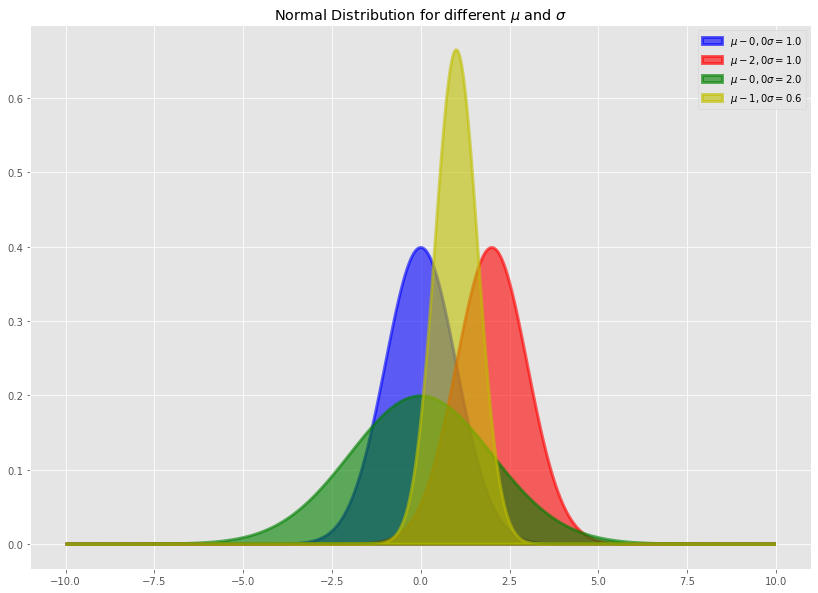

In [2]:
x = np.linspace(-10.0, 10.0, 1000)

plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=1.0), label='$\mu - 0,0 \sigma = 1.0$', c='b', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=2.0, scale=1.0), label='$\mu - 2,0 \sigma = 1.0$', c='r', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=2.0), label='$\mu - 0,0 \sigma = 2.0$', c='g', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=1.0, scale=0.6), label='$\mu - 1,0 \sigma = 0.6$', c='y', alpha=0.6, lw=3.0)

plt.title('Normal Distribution for different $\mu$ and $\sigma$')
plt.legend();

## Probability

The calculation below is known as [integration](https://www.mathsisfun.com/calculus/integration-introduction.html) and is used to calculate the area between the curve and the axis.

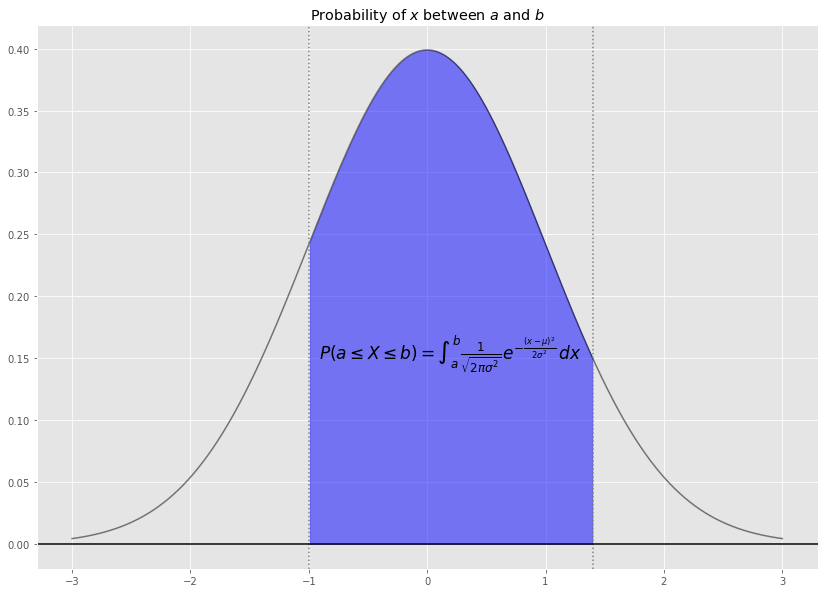

In [4]:
x = np.linspace(-3.0, 3.0, 1000)
y = ss.norm.pdf(x, loc=0.0, scale=1.0)

xseg = x[np.logical_and(-1.0 < x, x < 1.4)]
yseg = y[np.logical_and(-1.0 < x, x < 1.4)]

plt.plot(x, y, color='k', alpha=0.5)
plt.fill_between(xseg, yseg, color='b', alpha=0.5)
plt.axvline(x=-1.0, color='grey', linestyle=':')
plt.axvline(x= 1.4, color='grey', linestyle=':')

plt.text(0.2, 0.15, 
         r'$P (a \leq X \leq b) = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$', 
         horizontalalignment='center', size=17)

plt.axhline(y=0.0, color='black',linestyle='-')

plt.title('Probability of $x$ between $a$ and $b$');

In normal language, this is, stated by Ian:

    Integrate [the weird symbol after the equals sign] over
        1 divided by 
            square root of 2 pi multiplied by sigma, squared
        multiplied by e to the power of
            negative
                square of
                    x minus mu
            divided by
                square of
                    2 multiplied by sigma
    
Where mu is, as stated earlier, the mean of the distribution, and sigma is the standard deviation.

[Integration](https://www.mathsisfun.com/calculus/integration-introduction.html)

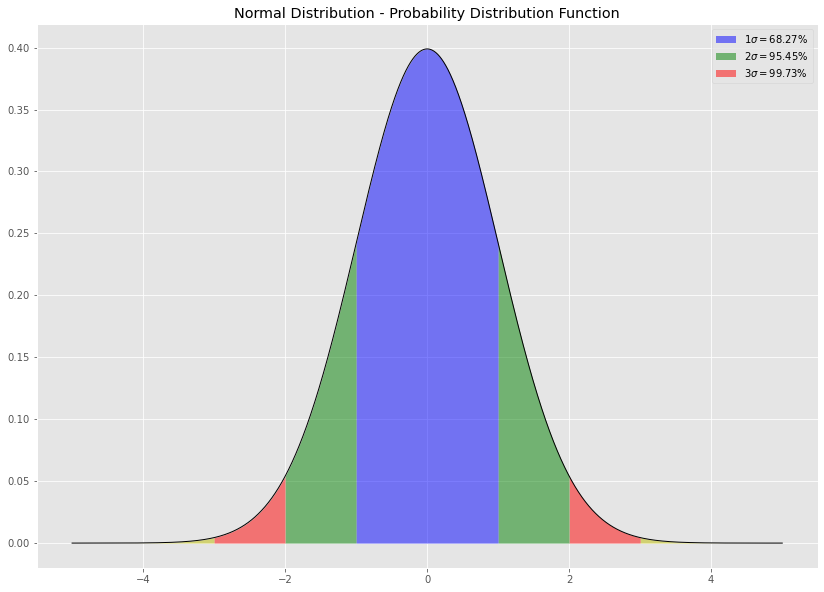

In [6]:
x = np.linspace(-5.0, 5.0, 10000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0)

xseg = x[np.logical_and(-5.0 <= x , x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-3.0 <= x , x <= -2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-2.0 <= x , x <= -1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-1.0 <= x , x <=  1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='b', alpha=0.5, linewidth=0, label='$1 \sigma = 68.27\%$')
xseg = x[np.logical_and( 1.0 <= x , x <=  2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0, label='$2 \sigma = 95.45\%$')
xseg = x[np.logical_and( 2.0 <= x , x <=  3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0, label='$3 \sigma = 99.73\%$')
xseg = x[np.logical_and( 3.0 <= x , x <=  5.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)

plt.title('Normal Distribution - Probability Distribution Function')

plt.legend();

The values above represent the probability of a value falling within that range, regardless of the mean or standard devision, so at a standard deviation of 3, 99.73% of the range falls within 3 of the mean.

## Sampling Distribution

Scaling the sample size to come up with a more accurate mean value. Using the random number generation process, you can distribute a sample size based on existing parameters, in this case those of the Standard Normal distribution.

In [14]:
# 0:6.3f just asks python to print numbers between 0 and 6 to 3 decimal places
np.set_printoptions(formatter={'float': lambda x: '{0:6.3f}'.format(x)})

sampsize = 10
nosamps = 1000
# generate 1000 samples of a 10-set sample
samp = np.random.standard_normal((nosamps, sampsize))

print(samp)

[[-0.220  1.638  0.781 ...  0.271  0.345 -0.969]
 [ 0.775  1.687 -0.690 ... -0.833 -0.270  0.563]
 [-2.526  0.370 -0.550 ... -0.505  0.190  0.072]
 ...
 [ 0.491  0.951 -1.946 ...  1.244 -0.542 -0.674]
 [ 0.333 -1.375  0.421 ... -0.633 -1.459 -1.728]
 [ 1.877 -0.531  2.333 ... -0.633  1.002 -0.660]]


In [15]:
# calculate the mean of each the above samples, the axis paramter in the sum() just determines to do it row-by-row
mean = samp.sum(axis=1) / sampsize
print(mean)

[ 0.141  0.170 -0.606 -0.044 -0.003  0.210 -0.115 -0.168 -0.014  0.383
 -0.080 -0.298 -0.073 -0.414 -0.043  0.566 -0.231 -0.165  0.296  0.021
 -0.081  0.136  0.117  0.280 -0.554 -0.055  0.423 -0.242  0.082 -0.086
 -0.477  0.042 -0.028  0.285  0.368 -0.054  0.037 -0.088 -0.136  0.214
 -0.171 -0.033  0.068  0.181 -0.141  0.197  0.233  0.572 -0.406  0.254
 -0.011 -0.494 -0.397 -0.514  0.583 -0.113  0.271 -0.046 -0.039 -0.407
  0.367  0.527 -0.387  0.021 -0.446  0.179 -0.130  0.000 -0.195 -0.242
 -0.158 -0.532  0.232  0.095 -0.507  0.144 -0.164  0.185  0.064  0.018
 -0.089  0.642 -0.016  0.369  0.340  0.104 -0.153 -0.565  0.301  0.043
 -0.046  0.154 -0.636  0.074 -0.430 -0.338 -0.236 -0.208  0.613 -0.183
 -0.084 -0.403 -0.837 -0.231  0.122  0.485  0.061  0.456 -0.000 -0.311
 -0.708 -0.674 -0.063 -0.058 -0.539 -0.286  0.194 -0.136  0.015 -0.515
  0.141 -0.350 -0.178 -0.119 -0.077  0.126  0.001 -0.269 -0.261 -0.710
 -0.377  0.130  0.296 -0.023  0.024  0.053 -0.005  0.091 -0.042  0.163
  0.11

In [16]:
# calculate the variance of each set by subtracting the mean from each value
# within the set, then square each result, then divide that by the sample size
vari = (samp - mean[:, np.newaxis])**2
vari = vari.sum(axis=1) / sampsize
# standard deviation is simply the square of the variance
stddev = np.sqrt(vari)


mean_stddev = stddev.sum() / nosamps
# this calculation will be fundamentally under-representative
print(mean_stddev)
# the below calculation, known as Bessel's correction, fixes this
print(mean_stddev * (sampsize / (sampsize - 1.0)))

0.9298811947615306
1.0332013275128118


C:\Users\stuar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


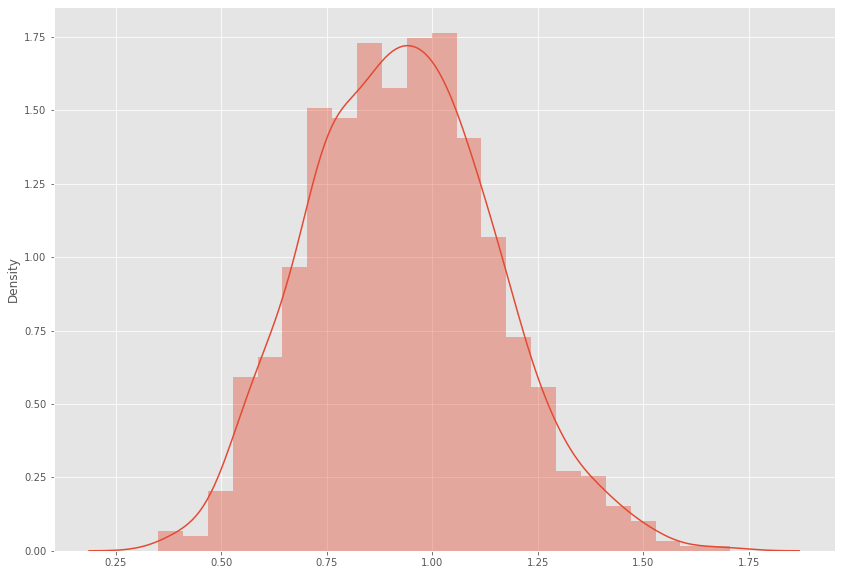

In [17]:
import seaborn as sns
sns.distplot(stddev);

Can see above that the mean usually falls just short of the expected value. The reason for this is that by taking the mean of any samples, you are automatically removing the most extreme values. If you generated 1,000,000 ten-set samples, then made ten-set samples of the 100,000 mean values, then made 10,000 ten-set samples of those means, and so on, you'd get a tighter and tighter samples.

https://www.youtube.com/watch?v=bHVPpomkUYs
https://www.youtube.com/watch?v=KkaU2ur3Ymw

![image](yt.png)